In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
data_train_path = r"C:\Users\admin\OneDrive\Desktop\jupyter\animal_classification\animals\train"
data_test_path = r"C:\Users\admin\OneDrive\Desktop\jupyter\animal_classification\animals\test"
data_val_path = r"C:\Users\admin\OneDrive\Desktop\jupyter\animal_classification\animals\validation"

In [22]:
img_width = 224
img_height = 224

In [23]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 1944 files belonging to 15 classes.


In [24]:
data_cat = data_train.class_names

In [25]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 1944 files belonging to 15 classes.


In [26]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 1944 files belonging to 15 classes.


In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.cob
])

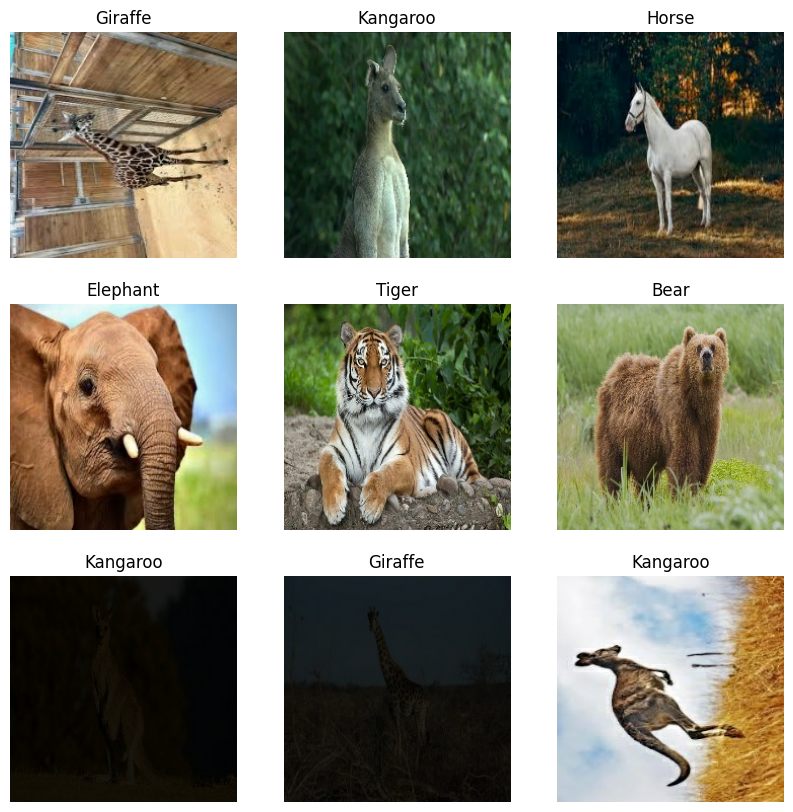

In [29]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [31]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [39]:
epochs_size = 25
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size
)

Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 39s 572ms/step - accuracy: 0.1321 - loss: 3.1296 - val_accuracy: 0.3966 - val_loss: 2.0868
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 546ms/step - accuracy: 0.4475 - loss: 1.8535 - val_accuracy: 0.7181 - val_loss: 1.1021
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 557ms/step - accuracy: 0.6957 - loss: 1.0525 - val_accuracy: 0.7994 - val_loss: 0.7482
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 555ms/step - accuracy: 0.8291 - loss: 0.6257 - val_accuracy: 0.9465 - val_loss: 0.2456
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 541ms/step - accuracy: 0.9336 - loss: 0.2739 - val_accuracy: 0.9697 - val_loss: 0.1421
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 549ms/step - accuracy: 0.9651 - loss: 0.1705 - val_accuracy: 0.9794 - val_loss: 0.1186
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 552ms/step - accuracy: 0.9685 - loss: 0.1269 - val_accuracy: 0.9784 - val_loss: 0.0997
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 548ms/step - accuracy: 0.9805 - loss: 0.0962 - val_accu

Text(0.5, 1.0, 'Loss')

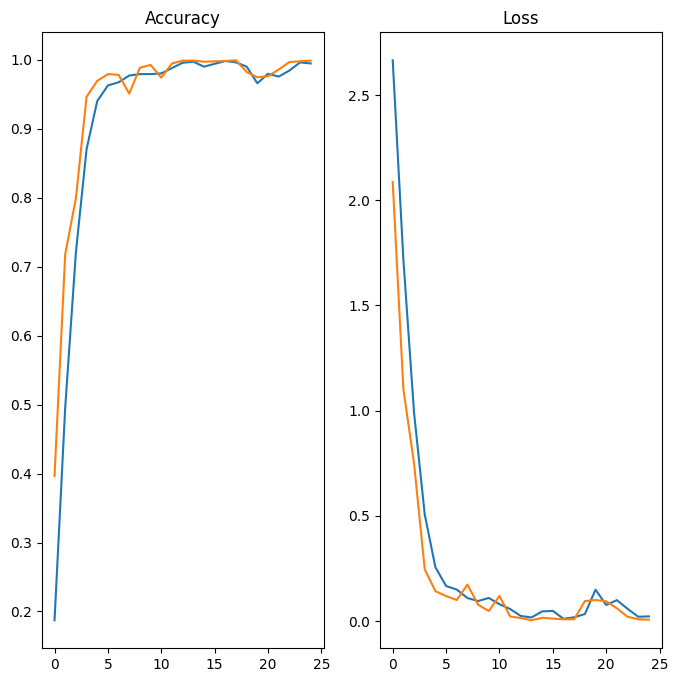

In [40]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, 
         history.history['accuracy'],
         label='Training Accuracy')
plt.plot(epochs_range, 
         history.history['val_accuracy'],
         label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, 
         history.history['loss'],
         label='Training Loss')
plt.plot(epochs_range, 
         history.history['val_loss'],
         label='Validation Loss')
plt.title('Loss')


In [64]:
image = 'cat.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [65]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [66]:
score = tf.nn.softmax(predict)

In [67]:
print('Animal in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Animal in image is Cat with accuracy of 100.00


In [68]:
model.save('Image_classify.keras')